wine.csv

- epochs가 50번이면 순전파와 역전파를 50번 실시한다는 의미이다.
- 최적의 학습이 40번째에 이루어졌다면 -> 하나씩 기록하면서 

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('../data/wine.csv', header=None)
df.shape # 6496 x 13

(6497, 13)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [13]:
# X-와인의 속성, y-와인의 분류
X = df.iloc[:,:12]
y = df.iloc[:,12]

In [14]:
# 데이터셋 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [21]:
# 모델 설정 -> # 입력개수 x 출력개수 + 바이어스
model = Sequential()
model.add(Dense(30, input_dim=(X_train.shape[1]), activation='relu')) # 12 x 30 + 30 = 390
model.add(Dense(12, activation='relu')) # 30 x 12 + 12 = 372
model.add(Dense(8, activation='relu')) # 12 x 8 + 8 = 104
model.add(Dense(1, activation='sigmoid')) # 8 x 1 + 1 = 9
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# 모델 저장
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath = "model/0902wine/{epoch:02d}-{val_accuracy:.4f}.hdf5" # 50-0.95 이런식
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델실행 
history = model.fit(X_train, y_train, epochs=50, batch_size=500 
                   ,validation_split=0.25
                   ,verbose=1
                   ,callbacks=[checkpointer]) 


Epoch 1/50
1/8 [==>...........................] - ETA: 0s - loss: 0.1079 - accuracy: 0.9640
Epoch 1: saving model to model/0902wine\01-0.9731.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.1019 - accuracy: 0.9656 - val_loss: 0.0791 - val_accuracy: 0.9731
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0740 - accuracy: 0.9760
Epoch 2: saving model to model/0902wine\02-0.9715.hdf5
8/8 [==============================] - 0s 5ms/step - loss: 0.1001 - accuracy: 0.9661 - val_loss: 0.0783 - val_accuracy: 0.9715
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.1031 - accuracy: 0.9620
Epoch 3: saving model to model/0902wine\03-0.9723.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 0.0990 - accuracy: 0.9669 - val_loss: 0.0770 - val_accuracy: 0.9723
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0969 - accuracy: 0.9700
Epoch 4: saving model to model/0902wine\04-0.9731.hdf5
8/8 [==========================

Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 0.1007 - accuracy: 0.9640
Epoch 31: saving model to model/0902wine\31-0.9808.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 0.0815 - accuracy: 0.9764 - val_loss: 0.0622 - val_accuracy: 0.9808
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0644 - accuracy: 0.9780
Epoch 32: saving model to model/0902wine\32-0.9815.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 0.0802 - accuracy: 0.9754 - val_loss: 0.0608 - val_accuracy: 0.9815
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0695 - accuracy: 0.9840
Epoch 33: saving model to model/0902wine\33-0.9831.hdf5
8/8 [==============================] - 0s 5ms/step - loss: 0.0797 - accuracy: 0.9772 - val_loss: 0.0607 - val_accuracy: 0.9831
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0730 - accuracy: 0.9780
Epoch 34: saving model to model/0902wine\34-0.9823.hdf5
8/8 [==================

In [29]:
# 테스트 결과출력
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]:0.3}')
# 0.8 x 0.25 = 0.2 정도를 검증데이터로 해서 보여줌

41/41 [==============================] - 0s 785us/step - loss: 0.1243 - accuracy: 0.9638
Test accuracy: 0.964


# 그래프로 과적합 확인하기

In [37]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.101867,0.965615,0.079131,0.973077
1,0.100140,0.966128,0.078288,0.971538
2,0.098963,0.966898,0.076974,0.972308
3,0.098414,0.968181,0.076454,0.973077
4,0.097304,0.967154,0.075465,0.976923


In [34]:
hist_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

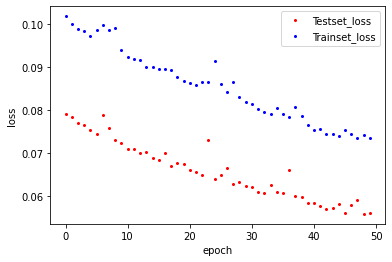

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 학습 자동 중단
- 이상이 있다고 판단되면 종료되게 설정 
- EarlyStopping()

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
# 학습이 언제 자동 중단 될지를 설정한다.
# 검증셋의 오차가 20번 낮아지면 종료
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20) 
#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="model/0902wine-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss'
                               , verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train
                  , epochs=2000, batch_size=500
                  , validation_split=0.25, verbose=1
                  , callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0720 - accuracy: 0.9777 - val_loss: 0.0548 - val_accuracy: 0.9838
Epoch 2/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0715 - accuracy: 0.9792 - val_loss: 0.0545 - val_accuracy: 0.9831
Epoch 3/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0706 - accuracy: 0.9795 - val_loss: 0.0547 - val_accuracy: 0.9838
Epoch 4/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9797 - val_loss: 0.0549 - val_accuracy: 0.9846
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.9782 - val_loss: 0.0541 - val_accuracy: 0.9831
Epoch 6/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.0565 - val_accuracy: 0.9815
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0695 - accuracy: 0.9790 - val_loss: 0.0537 - val_accuracy: 0.9838
Epoch 8/2000
8/8 [==

8/8 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9828 - val_loss: 0.0448 - val_accuracy: 0.9846
Epoch 60/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0554 - accuracy: 0.9833 - val_loss: 0.0448 - val_accuracy: 0.9862
Epoch 61/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9828 - val_loss: 0.0453 - val_accuracy: 0.9869
Epoch 62/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9826 - val_loss: 0.0445 - val_accuracy: 0.9862
Epoch 63/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9838 - val_loss: 0.0443 - val_accuracy: 0.9846
Epoch 64/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0552 - accuracy: 0.9813 - val_loss: 0.0472 - val_accuracy: 0.9831
Epoch 65/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9818 - val_loss: 0.0454 - val_accuracy: 0.9838
Epoch 66/2000
8/8 [========

8/8 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9856 - val_loss: 0.0474 - val_accuracy: 0.9815
Epoch 118/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0522 - accuracy: 0.9828 - val_loss: 0.0407 - val_accuracy: 0.9854
Epoch 119/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0386 - val_accuracy: 0.9877
Epoch 120/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0393 - val_accuracy: 0.9900
Epoch 121/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9841 - val_loss: 0.0400 - val_accuracy: 0.9846
Epoch 122/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9849 - val_loss: 0.0383 - val_accuracy: 0.9877
Epoch 123/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0382 - val_accuracy: 0.9908
Epoch 124/2000
8/8 [=

Epoch 175/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0464 - accuracy: 0.9869 - val_loss: 0.0339 - val_accuracy: 0.9931
Epoch 176/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0459 - accuracy: 0.9869 - val_loss: 0.0358 - val_accuracy: 0.9923
Epoch 177/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0456 - accuracy: 0.9874 - val_loss: 0.0334 - val_accuracy: 0.9915
Epoch 178/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9869 - val_loss: 0.0374 - val_accuracy: 0.9854
Epoch 179/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0441 - val_accuracy: 0.9815
Epoch 180/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9854 - val_loss: 0.0353 - val_accuracy: 0.9862
Epoch 181/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9877 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 

Epoch 233/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9874 - val_loss: 0.0282 - val_accuracy: 0.9915
Epoch 234/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0416 - accuracy: 0.9887 - val_loss: 0.0382 - val_accuracy: 0.9838
Epoch 235/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.9879 - val_loss: 0.0322 - val_accuracy: 0.9862
Epoch 236/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0285 - val_accuracy: 0.9915
Epoch 237/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.9892 - val_loss: 0.0311 - val_accuracy: 0.9892
Epoch 238/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9887 - val_loss: 0.0319 - val_accuracy: 0.9900


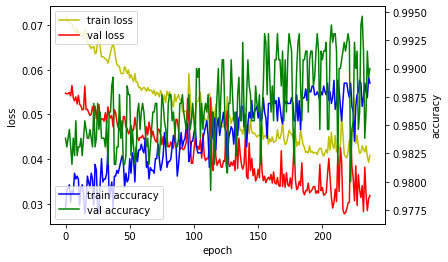

In [40]:
# 5. 모델 학습과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

# 모델 불러오기

In [42]:
# 모델을 새로 불러옵니다.
from tensorflow.keras.models import load_model
model = load_model('model/0902wine-bestmodel.hdf5') 

# 불러온 모델을 테스트셋에 적용해 정확도를 구합니다. 
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 761us/step - loss: 0.0849 - accuracy: 0.9762
Test accuracy: 0.9761538505554199
